In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [3]:
!ls

moore.csv  sample_data


In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [5]:
data = pd.read_csv("moore.csv",header=None).values
type(data)


numpy.ndarray

In [6]:
data.shape


(162, 2)

In [7]:
y_original = data[:,1].reshape(-1,1)


In [8]:
Y = np.log(y_original)
X = data[:,0].reshape(-1,1)

In [9]:
#Normalization
mx = X.mean()
sx = np.std(X)
X_norm = (X - mx)/sx

my = Y.mean()
sy = np.std(Y)
Y_norm = (Y-my)/sy




In [10]:
X_norm_tensor = torch.from_numpy(X_norm.astype("float32"))
Y_norm_tensor = torch.from_numpy(Y_norm.astype("float32"))

In [11]:
X_norm_tensor.size(), Y_norm_tensor.size()

(torch.Size([162, 1]), torch.Size([162, 1]))

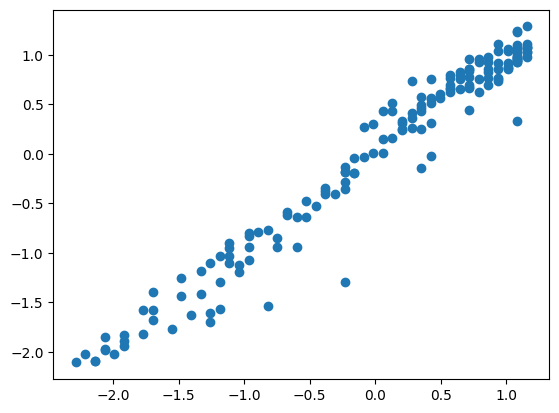

In [12]:
plt.scatter(X_norm_tensor.numpy(),Y_norm_tensor.numpy())
plt.show()

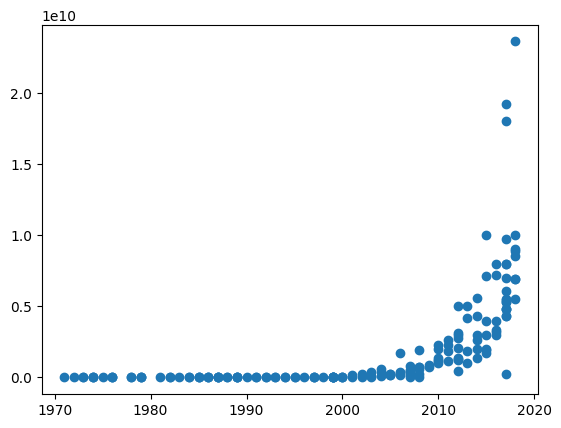

In [13]:
plt.scatter(X,y_original)
plt.show()

In [14]:
#model building
model = nn.Linear(1,1)

In [15]:
criterion  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1,momentum = 0.7)

In [16]:
#Training
epochs = 200
losses = []

for i in range(epochs):

  optimizer.zero_grad()

  outputs = model(X_norm_tensor)

  loss = criterion(outputs,Y_norm_tensor)

  loss.backward()

  losses.append(loss.item())
  
  print(f"epoch-{i+1}/{epochs} -- {loss}")

  optimizer.step()





epoch-1/200 -- 1.2753154039382935
epoch-2/200 -- 0.830054759979248
epoch-3/200 -- 0.3476889729499817
epoch-4/200 -- 0.08312998712062836
epoch-5/200 -- 0.043705906718969345
epoch-6/200 -- 0.10419365018606186
epoch-7/200 -- 0.14998109638690948
epoch-8/200 -- 0.1417999267578125
epoch-9/200 -- 0.10018699616193771
epoch-10/200 -- 0.06026867777109146
epoch-11/200 -- 0.040739141404628754
epoch-12/200 -- 0.03950650990009308
epoch-13/200 -- 0.045093487948179245
epoch-14/200 -- 0.04839208349585533
epoch-15/200 -- 0.04702024161815643
epoch-16/200 -- 0.04323124513030052
epoch-17/200 -- 0.039978157728910446
epoch-18/200 -- 0.038576409220695496
epoch-19/200 -- 0.03863365203142166
epoch-20/200 -- 0.03912748768925667
epoch-21/200 -- 0.039350010454654694
epoch-22/200 -- 0.03917873650789261
epoch-23/200 -- 0.038841232657432556
epoch-24/200 -- 0.03858024254441261
epoch-25/200 -- 0.0384831540286541
epoch-26/200 -- 0.038500089198350906
epoch-27/200 -- 0.038542140275239944
epoch-28/200 -- 0.0385556630790233

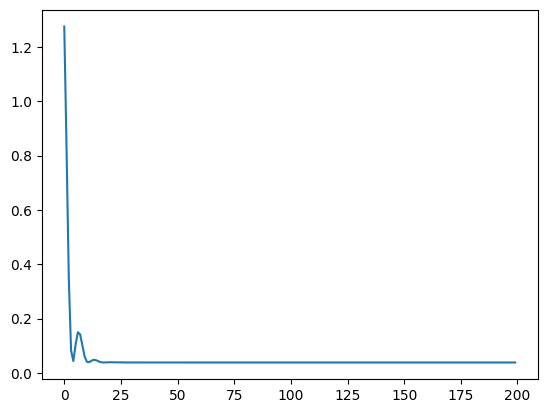

In [17]:
plt.plot(losses)
plt.show()

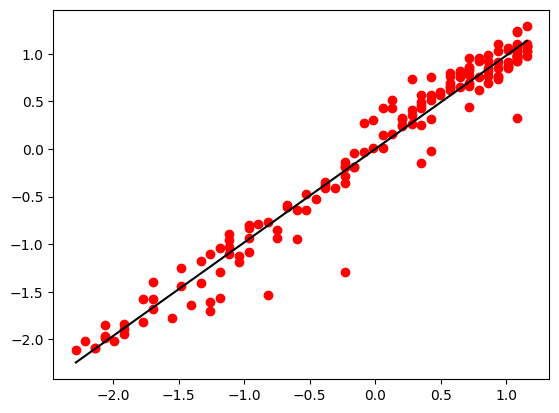

In [18]:
plt.scatter(X_norm_tensor.numpy(),Y_norm_tensor.numpy(), c = "r")
plt.plot(X_norm_tensor,model(X_norm_tensor).detach().numpy(),label = "Fittted line", c = "black")
plt.show()

In [19]:
weight = model.weight.data.numpy()
bias = model.bias.data.numpy()
print(weight,  bias)

[[0.9805711]] [-1.5517058e-08]


In [20]:
np.e

2.718281828459045

In [21]:
(0.980571)*(sy/sx)

0.34168244449925406

In [22]:
(np.e)**(0.34168244449925406)

1.4073133264607096